In [1]:
import pandas as pd
import seaborn as sns

In [2]:
wnba = pd.read_csv('wnba.csv')

In [11]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,age_mean_relative,min_mean_relative
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,young,below average
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,old,average or above
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,young,average or above
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,old,average or above
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,young,below average


In [13]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'age_mean_relative', 'min_mean_relative'],
      dtype='object')

In [15]:
wnba['Experience'][1:5]

1    12
2     4
3     6
4     R
Name: Experience, dtype: object

In [ ]:
def make_ex_ordinal(row):
    if row['Experience'] == 'R':
        return 'Rookied'
    if (20 < row['PTS'] <=  80):
        return 'Little experience'
    if (80 < row['PTS'] <=  150):
        return 'Experienced'
    if (150 < row['PTS'] <= 300):
        return 'Very experienced'
    else:
        return 'Veteran'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

* Usng sns.countplot(), generate a grouped bar plot similar to the one above.
    * Place the Exp_ordinal variable on the x-axis.
    * Generate the bar plots for the Pos variable. The data set is stored in wnba variable.
    * Using the order parameter of sns.countplot(), order the values on the x-axis in ascending order. The order parameter takes in a list of strings, so you should use order = ['Rookie', 'Little experience', ..........].
    * Using the hue_order parameter, order the bars of each bar plot in ascending alphabetic order. hue_order takes in a list of strings, so you can use hue_order = ['C', 'F', ......].

In [10]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba, 
order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'], 
hue_order = ['C', 'F', 'F/C','G','G/F'])

ValueError: Could not interpret input 'Exp_ordinal'

* Generate a grouped bar plot to confirm or reject our hypothesis. Using sns.countplot():
    * Place the age_mean_relative variable on the x-axis. The age_mean_relative and min_mean_relative are already defined.
    * Generate the frequency distributions for the min_mean_relative variable.
* Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string 'confirmation' to a variable named result. If it's a rejection, assign the string 'rejection' to the variable result.


In [3]:
def make_age_ordinal(row):
    if row['Age'] >= 27:
        return 'old'
    else:
        return 'young'

def make_min_ordinal(row):
    if row['MIN'] >= 497:
        return 'average or above'
    else:
        return 'below average'

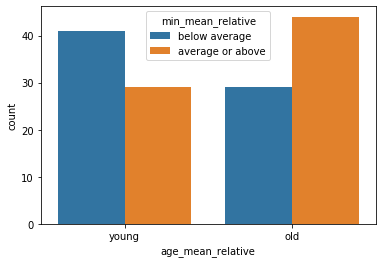

In [4]:
wnba['age_mean_relative'] = wnba.apply(make_age_ordinal, axis=1)
## lamba method
# wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba.apply(make_min_ordinal, axis=1)
## lambda method
# wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')
#wnba.head()
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative' , data=wnba)
result = 'rejection'

# 4/11


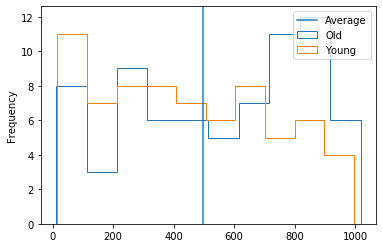

In [8]:
import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype='step',label='Old', legend=True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype='step',label='Young', legend=True)
plt.axvline(x=497,label='Average')
plt.legend()

# 5/11 Kernel Density Estimate Plots

* We can smooth out our two histograms above for old and young players using the Series.plot.kde() function:

```python
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
```
* Each of the smoothed histograms above is called a kernel density estimate plot or, shorter, kernel density plot. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values

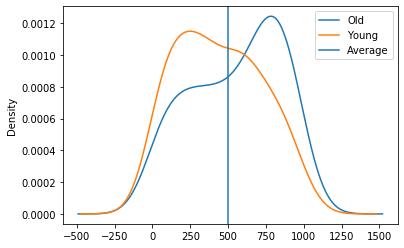

In [9]:
# Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.

## The vertical line should be at point 497 on the x-axis.
## Label the vertical line 'Average' and make sure the label is displayed in the legend.


wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497,label='Average')
plt.legend()

# 6/11 Drawbacks of KDEs

* Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. 
* However, kernel density plots tend to become unreadable as we reach five distributions or more.
* Example: Analyze distribution of player height as a function of player position. 

```python
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)
```

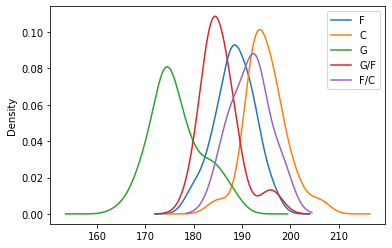

In [16]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

# 7/11 Strip Plots

* We can use the sns.stripplot() function from the seaborn module. We place the Pos variable on the x-axis and Height on the y-axis:

```python
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)
```

* A big downside of strip plots is that the bullet points overlap. We can fix this by adding a bit of jitter to each distribution. We can do this by setting the jitter parameter to True:

```python
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)
```

* In fact, strip plots are actually scatter plots. When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

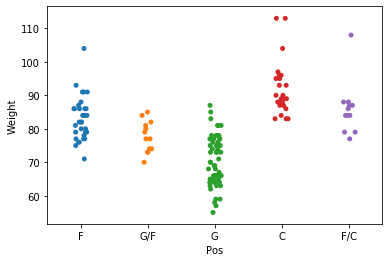

In [17]:
# Using strip plots, examine the distribution of player weight (not height) as a function of player position. The graph should have the following properties:
#    The Pos variable in on the x-axis and the Weight variable on the y-axis.
#    Each strip plot has jitter added to it. The amount of jitter to apply is the one specific to jitter = True.

sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)



# 8/11 Box plots

* Box plots shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution.

```python
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)
```

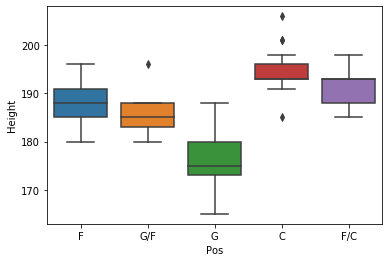

In [18]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

# 9/11 Outliers

* The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an outlier.
* A value is an outlier if:
    * It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
    * It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
* From the output of `wnba[wnba['Pos'] == 'C']['Height'].describe()`, we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.
* Every value that is 3x1.5 bigger than the upper quartile is considered an outlier. 3x1.5=4.5, and the upper quartile is 196. This means that any value greater than 196+4.5=200.5 is considered an outlier.
* Similarly, every value that is lower that the lower quartile is an outlier. 3x1.5=4.5, and the lower quartile is 193. This means that any value less than 193-4.5=188.5 is an outlier.
* When we generate boxplots, we can increase or decrease this factor by using the whis parameter of the sns.boxplot() function. This is the same height distribution for centers without any outliers:
```
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4, orient = 'vertical', width = .15)
```

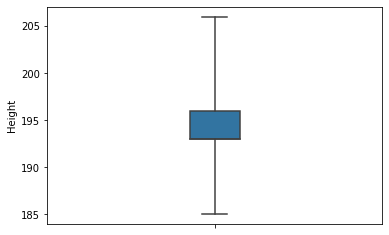

In [19]:
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4, orient = 'vertical', width = .15)

In [20]:
#    Find the interquartile range, and assign the result to a variable named iqr.
#    Using a factor of 1.5, calculate the lower and upper bound outside which values are considered outliers.
#        Assign the value of the lower bound to a variable named lower_bound.
#        Assign the upper bound to a variable named upper_bound.
#    Find how many values in the distribution are outliers.
#        Assign the number of outliers below the lower bound to a variable named outliers_low.
#        Assign the number of outliers below the upper bound to a variable named outliers_high.
#    Plot a boxplot to check whether your answers are sensible.

print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [21]:
iqr = 29-22
lower_bound = 22-1.5*iqr
upper_bound = 29+1.5*iqr
outliers_low = len(wnba[wnba['Games Played']<lower_bound])
outliers_high = len(wnba[wnba['Games Played']>upper_bound])
print(lower_bound)
print(upper_bound)
print(outliers_high)
print(outliers_low)

11.5
39.5
0
12


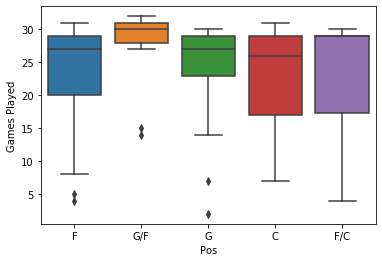

In [22]:
sns.boxplot(x = 'Pos', y='Games Played', data= wnba)

# 10/11 Next steps

* How to compare frequency distributions using graphs. 
* Grouped bar plots are ideal to compare the frequency distributions of nominal or ordinal variables. 
* For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.